<a href="https://colab.research.google.com/github/Pubudu-Piyankara/lakTravel_ML_Model/blob/main/lakTravel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

connect google drive with notebook

In [136]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
# !pip install openpyxl

In [138]:
# !apt-get install git

In [139]:
# !git config --global user.name "Pubudu-Piyankara"
# !git config --global user.email "pubudupiyankara.me@gmail.com"

In [140]:
!git clone https://github.com/Pubudu-Piyankara/lakTravel_ML_Model.git


fatal: destination path 'lakTravel_ML_Model' already exists and is not an empty directory.


In [141]:
import pandas as pd
import numpy as np
from scipy import stats


In [142]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Source/all.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,Date,Temperature,Precipitation,Wind Speed
0,1/1/2019,24.2,0.0,2.3
1,2/1/2019,22.6,0.0,2.2
2,3/1/2019,23.3,0.0,3.1
3,4/1/2019,23.6,0.0,3.4
4,5/1/2019,23.2,0.0,3.7


In [143]:
df.dtypes

,0
Date,object
Temperature,float64
Precipitation,float64
Wind Speed,float64


In [144]:
df.shape

(1826, 4)

In [145]:
print(df.isnull().sum())

Date             0
Temperature      0
Precipitation    0
Wind Speed       0
dtype: int64


In [146]:
df.isna().sum()

,0
Date,0
Temperature,0
Precipitation,0
Wind Speed,0


In [147]:
df1= df.dropna()
df1.isna().sum()

,0
Date,0
Temperature,0
Precipitation,0
Wind Speed,0


In [148]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1821,False
1822,False
1823,False
1824,False


In [149]:
df.drop_duplicates()

,Date,Temperature,Precipitation,Wind Speed
0,1/1/2019,24.2,0.0,2.3
1,2/1/2019,22.6,0.0,2.2
2,3/1/2019,23.3,0.0,3.1
3,4/1/2019,23.6,0.0,3.4
4,5/1/2019,23.2,0.0,3.7
...,...,...,...,...
1821,27/12/2023,24.3,28.3,2.3
1822,28/12/2023,23.3,12.4,1.4
1823,29/12/2023,23.0,10.9,1.4
1824,30/12/2023,23.9,23.8,1.4


In [150]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Convert to datetime

In [151]:
# these features help the model learn the relationship between time and weather, allowing it to make better predictions!
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [152]:
df.head(20)

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend
0,2019-01-01,24.2,0.0,2.3,2019,1,1,1,0
1,2019-01-02,22.6,0.0,2.2,2019,1,2,2,0
2,2019-01-03,23.3,0.0,3.1,2019,1,3,3,0
3,2019-01-04,23.6,0.0,3.4,2019,1,4,4,0
4,2019-01-05,23.2,0.0,3.7,2019,1,5,5,1
5,2019-01-06,23.6,0.0,1.9,2019,1,6,6,1
6,2019-01-07,24.1,0.0,0.5,2019,1,7,0,0
7,2019-01-08,23.6,0.0,3.0,2019,1,8,1,0
8,2019-01-09,25.0,0.0,3.1,2019,1,9,2,0
9,2019-01-10,24.3,0.0,2.8,2019,1,10,3,0


# **Data Visuliazation**
outliers

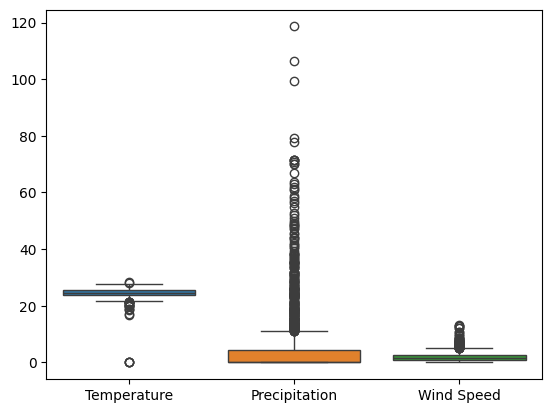

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[['Temperature', 'Precipitation', 'Wind Speed']])
plt.show()


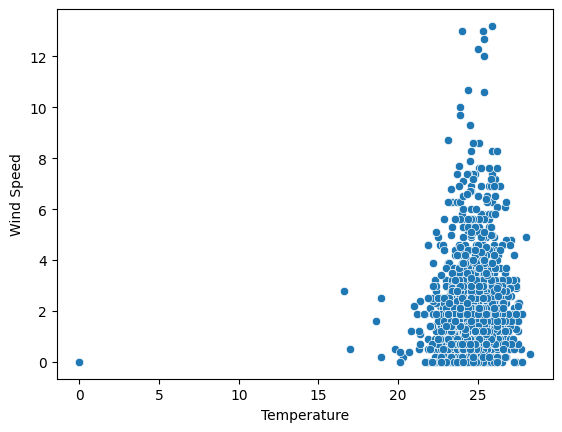

In [154]:
# Scatter plot
sns.scatterplot(x='Temperature', y='Wind Speed', data=df)
plt.show()

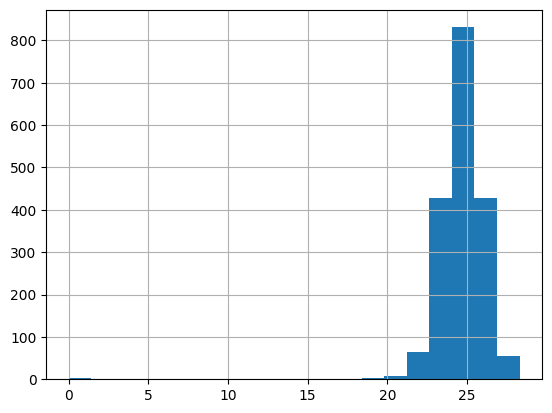

In [155]:
# Histrogram
df['Temperature'].hist(bins=20)
plt.show()

In [156]:
from scipy import stats
import numpy as np

# Calculate Z-scores for Temperature, Precipitation, and Wind Speed
z_scores = np.abs(stats.zscore(df[['Temperature', 'Precipitation', 'Wind Speed']]))

# Set a threshold (commonly 3) for identifying outliers
data_no_outliers = df[(z_scores < 3).all(axis=1)]


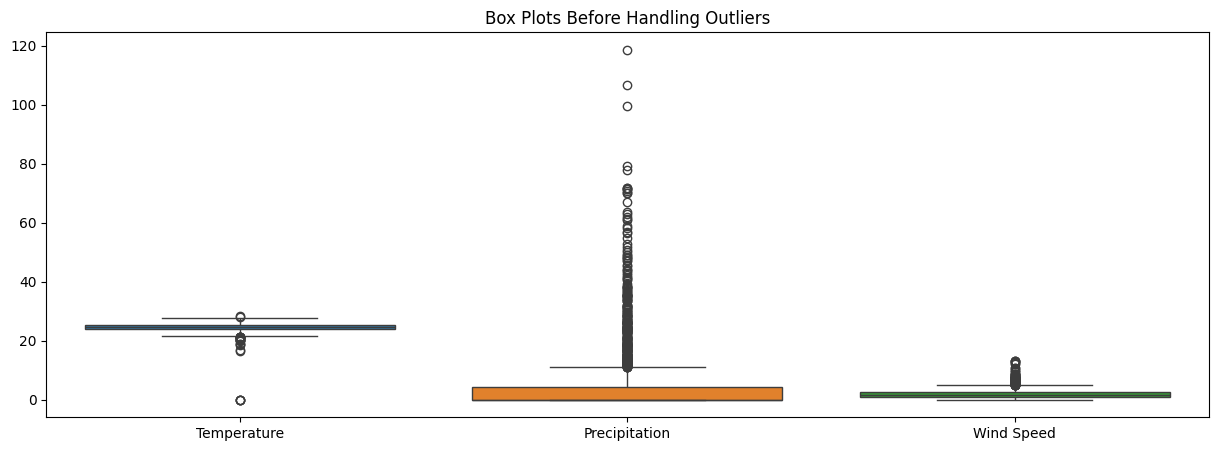

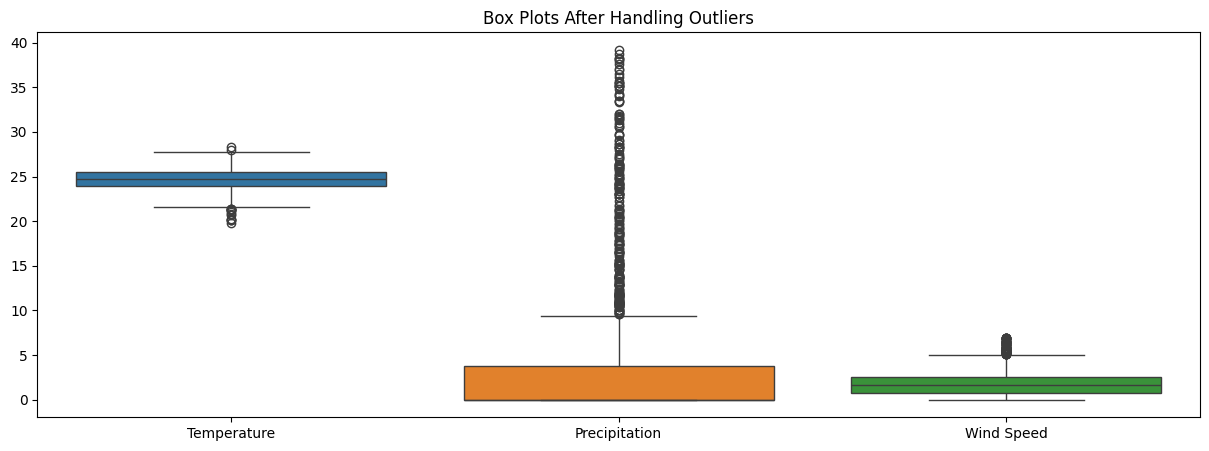

In [157]:
import seaborn as sns

# Plot box plots for original data
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['Temperature', 'Precipitation', 'Wind Speed']])
plt.title('Box Plots Before Handling Outliers')
plt.show()

# Plot box plots for data after handling outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=data_no_outliers[['Temperature', 'Precipitation', 'Wind Speed']])
plt.title('Box Plots After Handling Outliers')
plt.show()


In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [159]:
# # Convert the Date column to datetime format if it's not already
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [160]:
# Function to categorize temperature
def temperature_category(temp):
    if temp > hot_threshold:
        return 'Hot'
    elif comfortable_min <= temp <= comfortable_max:
        return 'Comfortable'
    else:
        return 'Cool'

# Function to categorize precipitation
def rainfall_category(precip):
    if precip > heavy_rainfall_threshold:
        return 'Heavy'
    elif moderate_rainfall_min <= precip <= moderate_rainfall_max:
        return 'Moderate'
    else:
        return 'Light'

# Function to categorize wind speed
def wind_speed_category(wind):
    if wind > strong_winds_threshold:
        return 'Strong'
    elif moderate_winds_min <= wind <= moderate_winds_max:
        return 'Moderate'
    else:
        return 'Light'

# Apply categorical functions using .loc[]
data_no_outliers.loc[:, 'Temperature_Category'] = data_no_outliers['Temperature'].apply(temperature_category)
data_no_outliers.loc[:, 'Precipitation_Category'] = data_no_outliers['Precipitation'].apply(rainfall_category)
data_no_outliers.loc[:, 'Wind_Speed_Category'] = data_no_outliers['Wind Speed'].apply(wind_speed_category)

# Display the updated DataFrame with categorical labels
print(data_no_outliers)


           Date  Temperature  Precipitation  Wind Speed  Year  Month  Day  \
0    2019-01-01         24.2            0.0         2.3  2019      1    1   
1    2019-01-02         22.6            0.0         2.2  2019      1    2   
2    2019-01-03         23.3            0.0         3.1  2019      1    3   
3    2019-01-04         23.6            0.0         3.4  2019      1    4   
4    2019-01-05         23.2            0.0         3.7  2019      1    5   
...         ...          ...            ...         ...   ...    ...  ...   
1821 2023-12-27         24.3           28.3         2.3  2023     12   27   
1822 2023-12-28         23.3           12.4         1.4  2023     12   28   
1823 2023-12-29         23.0           10.9         1.4  2023     12   29   
1824 2023-12-30         23.9           23.8         1.4  2023     12   30   
1825 2023-12-31         23.6            5.4         1.6  2023     12   31   

      DayOfWeek  IsWeekend Temperature_Category Precipitation_Category  \
0

<ipython-input-160-306d4a5c3fe8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.loc[:, 'Temperature_Category'] = data_no_outliers['Temperature'].apply(temperature_category)
<ipython-input-160-306d4a5c3fe8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.loc[:, 'Precipitation_Category'] = data_no_outliers['Precipitation'].apply(rainfall_category)
<ipython-input-160-306d4a5c3fe8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [161]:
# def classify_temperature(temp):
#     if temp > 26:
#         return 'Hot'
#     elif 22 <= temp <= 26:
#         return 'Comfortable'
#     else:
#         return 'Cool'

# df['Temperature_Class'] = df['Temperature'].apply(classify_temperature)


In [162]:
# # First, group the data by month and calculate total rainfall
# df['Month'] = df['Date'].dt.month
# monthly_rainfall = df.groupby('Month')['Precipitation'].sum().reset_index()

# # Now classify the monthly rainfall
# def classify_rainfall(rain):
#     if rain > 200:
#         return 'Heavy Rainfall'
#     elif 100 <= rain <= 200:
#         return 'Moderate Rainfall'
#     else:
#         return 'Light Rainfall'

# monthly_rainfall['Rainfall_Class'] = monthly_rainfall['Precipitation'].apply(classify_rainfall)

# # Merge the classified rainfall back into the original dataset
# df = pd.merge(df, monthly_rainfall[['Month', 'Rainfall_Class']], on='Month', how='left')


In [163]:
# def classify_wind_speed(wind_speed):
#     if wind_speed > 15:
#         return 'Strong Winds'
#     elif 8 <= wind_speed <= 15:
#         return 'Moderate Winds'
#     else:
#         return 'Light Winds'

# df['Wind_Class'] = df['Wind Speed'].apply(classify_wind_speed)


In [164]:
# # Combine temperature, rainfall, and wind conditions into a single category
# df['Weather_Situation'] = df['Temperature_Class'] + '_' + df['Rainfall_Class'] + '_' + df['Wind_Class']


In [165]:
# # Features
# X = df[['Temperature', 'Precipitation', 'Wind Speed']]

# # Labels (Combined Weather Situation)
# y = df['Weather_Situation']


In [166]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")
# print(classification_report(y_test, y_pred))


In [167]:
# # Check temperature classification
# print(df[['Temperature', 'Temperature_Class']].head(10))

# # Check monthly rainfall classification
# print(monthly_rainfall[['Month', 'Precipitation', 'Rainfall_Class']])

# # Check wind speed classification
# print(df[['Wind Speed', 'Wind_Class']].head(10))


In [168]:
# print(df[['Temperature_Class', 'Rainfall_Class', 'Wind_Class', 'Weather_Situation']].head(10))


In [169]:
# # Check if the predictions match the actual values
# print("Actual vs Predicted")
# for actual, predicted in zip(y_test[:10], y_pred[:10]):
#     print(f"Actual: {actual}, Predicted: {predicted}")


In [170]:
data_no_outliers.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,Precipitation_Category,Wind_Speed_Category
0,2019-01-01,24.2,0.0,2.3,2019,1,1,1,0,Comfortable,Light,Light
1,2019-01-02,22.6,0.0,2.2,2019,1,2,2,0,Comfortable,Light,Light
2,2019-01-03,23.3,0.0,3.1,2019,1,3,3,0,Comfortable,Light,Light
3,2019-01-04,23.6,0.0,3.4,2019,1,4,4,0,Comfortable,Light,Light
4,2019-01-05,23.2,0.0,3.7,2019,1,5,5,1,Comfortable,Light,Light


In [171]:
print(data_no_outliers.isnull().sum())

Date                      0
Temperature               0
Precipitation             0
Wind Speed                0
Year                      0
Month                     0
Day                       0
DayOfWeek                 0
IsWeekend                 0
Temperature_Category      0
Precipitation_Category    0
Wind_Speed_Category       0
dtype: int64


**Z-score normalization (standardization)**

In [172]:
# Define thresholds
hot_threshold = 26
comfortable_min = 22
comfortable_max = 26
cool_threshold = 22
heavy_rainfall_threshold = 200
moderate_rainfall_min = 100
moderate_rainfall_max = 200
light_rainfall_threshold = 100
strong_winds_threshold = 15
moderate_winds_min = 8
moderate_winds_max = 15
light_winds_threshold = 8

In [173]:
# Calculate Z-scores for Temperature, Precipitation, and Wind Speed
features = ['Temperature', 'Precipitation', 'Wind Speed']
data_no_outliers[features] = stats.zscore(data_no_outliers[features])


# Verify the normalization
print(data_no_outliers[features].describe())



        Temperature  Precipitation    Wind Speed
count  1.738000e+03   1.738000e+03  1.738000e+03
mean   3.761216e-16  -3.270622e-17  5.314762e-17
std    1.000288e+00   1.000288e+00  1.000288e+00
min   -4.108723e+00  -5.002475e-01 -1.328733e+00
25%   -6.620312e-01  -5.002475e-01 -7.502595e-01
50%   -1.447089e-02  -5.002475e-01 -1.717863e-01
75%    6.539785e-01   4.462947e-03  4.789962e-01
max    2.993551e+00   4.706239e+00  3.660599e+00


<ipython-input-173-48bff2b5debb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[features] = stats.zscore(data_no_outliers[features])


In [174]:
data_no_outliers.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,Precipitation_Category,Wind_Speed_Category
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Comfortable,Light,Light
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Comfortable,Light,Light
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Comfortable,Light,Light
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Comfortable,Light,Light
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Comfortable,Light,Light


In [175]:
import pandas as pd
import numpy as np

# Define thresholds
hot_threshold = 26
comfortable_min = 22
comfortable_max = 26
cool_threshold = 22
heavy_rainfall_threshold = 200
moderate_rainfall_min = 100
moderate_rainfall_max = 200
light_rainfall_threshold = 100
strong_winds_threshold = 15
moderate_winds_min = 8
moderate_winds_max = 15
light_winds_threshold = 8

# Create binary and categorical labels using .loc[]
data_no_outliers.loc[:, 'Hot_Temperature'] = np.where(data_no_outliers['Temperature'] > hot_threshold, 1, 0)
data_no_outliers.loc[:, 'Comfortable_Temperature'] = np.where(
    (data_no_outliers['Temperature'] >= comfortable_min) &
    (data_no_outliers['Temperature'] <= comfortable_max), 1, 0)
data_no_outliers.loc[:, 'Cool_Temperature'] = np.where(data_no_outliers['Temperature'] < cool_threshold, 1, 0)

data_no_outliers.loc[:, 'Heavy_Rainfall'] = np.where(data_no_outliers['Precipitation'] > heavy_rainfall_threshold, 1, 0)
data_no_outliers.loc[:, 'Moderate_Rainfall'] = np.where(
    (data_no_outliers['Precipitation'] >= moderate_rainfall_min) &
    (data_no_outliers['Precipitation'] <= moderate_rainfall_max), 1, 0)
data_no_outliers.loc[:, 'Light_Rainfall'] = np.where(data_no_outliers['Precipitation'] < light_rainfall_threshold, 1, 0)

data_no_outliers.loc[:, 'Strong_Winds'] = np.where(data_no_outliers['Wind Speed'] > strong_winds_threshold, 1, 0)
data_no_outliers.loc[:, 'Moderate_Winds'] = np.where(
    (data_no_outliers['Wind Speed'] >= moderate_winds_min) &
    (data_no_outliers['Wind Speed'] <= moderate_winds_max), 1, 0)
data_no_outliers.loc[:, 'Light_Winds'] = np.where(data_no_outliers['Wind Speed'] < light_winds_threshold, 1, 0)

# Display the updated DataFrame with labels
print(data_no_outliers)


           Date  Temperature  Precipitation  Wind Speed  Year  Month  Day  \
0    2019-01-01    -0.432252      -0.500247    0.334378  2019      1    1   
1    2019-01-02    -1.769150      -0.500247    0.262069  2019      1    2   
2    2019-01-03    -1.184257      -0.500247    0.912851  2019      1    3   
3    2019-01-04    -0.933589      -0.500247    1.129779  2019      1    4   
4    2019-01-05    -1.267813      -0.500247    1.346706  2019      1    5   
...         ...          ...            ...         ...   ...    ...  ...   
1821 2023-12-27    -0.348696       3.258517    0.334378  2023     12   27   
1822 2023-12-28    -1.184257       1.146702   -0.316405  2023     12   28   
1823 2023-12-29    -1.434926       0.947475   -0.316405  2023     12   29   
1824 2023-12-30    -0.682920       2.660834   -0.316405  2023     12   30   
1825 2023-12-31    -0.933589       0.216973   -0.171786  2023     12   31   

      DayOfWeek  IsWeekend Temperature_Category  ... Wind_Speed_Category  \

<ipython-input-175-3b255781a7ce>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.loc[:, 'Hot_Temperature'] = np.where(data_no_outliers['Temperature'] > hot_threshold, 1, 0)
<ipython-input-175-3b255781a7ce>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.loc[:, 'Comfortable_Temperature'] = np.where(
<ipython-input-175-3b255781a7ce>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [176]:
data_no_outliers.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Comfortable,...,Light,0,0,1,0,0,1,0,0,1


In [177]:
# Extract month from the Date column
data_no_outliers.shape

(1738, 21)

In [179]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
data_copy = data_no_outliers.copy()

# Extract month from the Date column
data_copy['Month'] = data_copy['Date'].dt.month

# Filter for only numeric columns (like Temperature, Precipitation, Wind Speed)
numeric_columns = ['Temperature', 'Precipitation', 'Wind Speed']

# Group by Month and calculate average for the numeric columns
monthly_data = data_copy.groupby('Month')[numeric_columns].mean()

# Display the result
print(monthly_data)


       Temperature  Precipitation  Wind Speed
Month                                        
1        -0.768159      -0.257430    0.340201
2        -0.322309      -0.407474    0.250108
3         0.457217      -0.266573   -0.212839
4         0.779601       0.167784   -0.439579
5         0.788782       0.065737    0.007540
6         0.453557      -0.278046    0.254740
7         0.243901      -0.082293    0.438483
8         0.182815      -0.026067    0.425769
9        -0.319307       0.013440    0.110469
10       -0.421432       0.356766   -0.369466
11       -0.416844       0.481762   -0.555897
12       -0.737119       0.248113   -0.239698


In [181]:
data_copy.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Comfortable,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Comfortable,...,Light,0,0,1,0,0,1,0,0,1


In [180]:
# Categorize temperature based on the thresholds you provided
def categorize_temperature(temp):
    if temp > 26:
        return 'Hot'
    elif 22 <= temp <= 26:
        return 'Comfortable'
    else:
        return 'Cool'

# Categorize precipitation similarly
def categorize_precipitation(precip):
    if precip > 200:
        return 'Heavy Rainfall'
    elif 100 <= precip <= 200:
        return 'Moderate Rainfall'
    else:
        return 'Light Rainfall'

# Apply the functions to the monthly data
monthly_data['Temperature_Category'] = monthly_data['Temperature'].apply(categorize_temperature)
monthly_data['Precipitation_Category'] = monthly_data['Precipitation'].apply(categorize_precipitation)

print(monthly_data[['Temperature_Category', 'Precipitation_Category']])


      Temperature_Category Precipitation_Category
Month                                            
1                     Cool         Light Rainfall
2                     Cool         Light Rainfall
3                     Cool         Light Rainfall
4                     Cool         Light Rainfall
5                     Cool         Light Rainfall
6                     Cool         Light Rainfall
7                     Cool         Light Rainfall
8                     Cool         Light Rainfall
9                     Cool         Light Rainfall
10                    Cool         Light Rainfall
11                    Cool         Light Rainfall
12                    Cool         Light Rainfall
